In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import planetengine
from planetengine.features.noise import modular
from planetengine.features.noise import fourier
from planetengine.initials import sinusoidal
quickShow = planetengine.quickShow

In [61]:
# dither = modular.build(intensity = 7)
dither = fourier.build(pert = 1e-2, freq = 1e1)
system = planetengine.systems.isovisc.build(
    res = 32,
    Ra = 1e5,
    aspect = 1.,
    f = 1. / 3.,
    _initial_temperatureField = sinusoidal.build(),
    dither = dither
    )
# system2 = planetengine.systems.isovisc.build(res = 64, Ra = 1e5, dither = dither)

In [62]:
from timeit import timeit

In [63]:
timeit(system.iterate, number = 10)

1.955773699999554

Variable{-9223363298940752156}



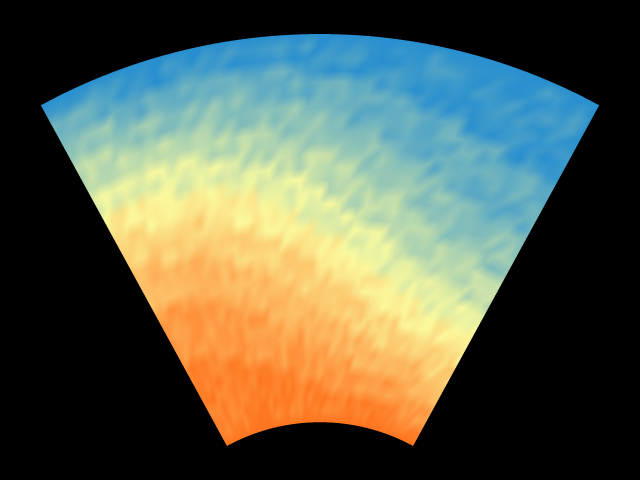

Variable{-9223363298940752156}



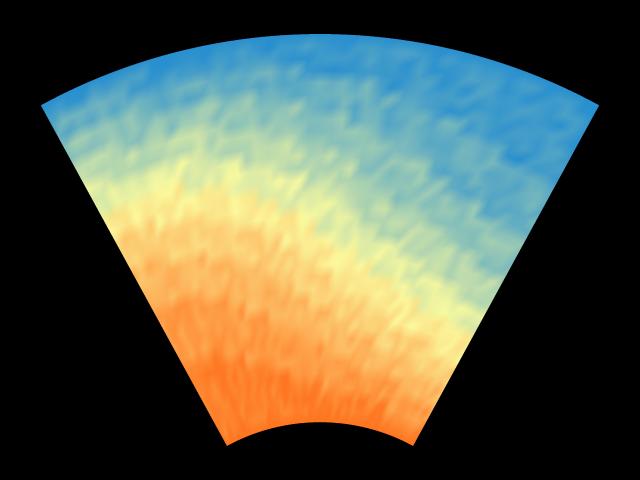

Variable{-9223363298940752156}



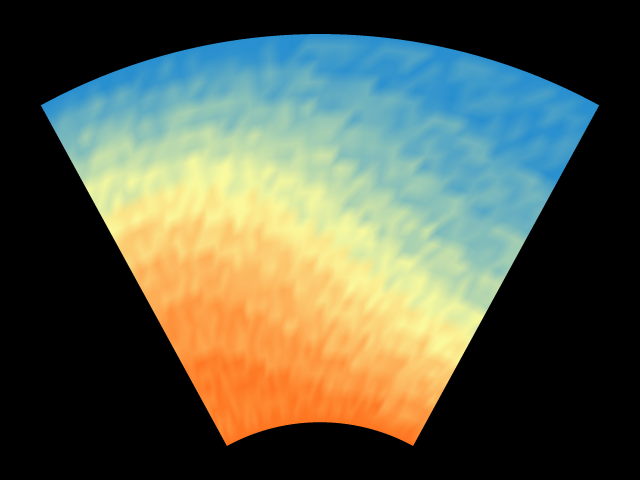

In [52]:
# system.locals.temperatureField.data[:] = 0.5
for i in range(3):
    system.iterate()
    with system.dither:
        quickShow(system.locals.temperatureField, facecolour = 'black')